# ***DIGITS_CLASSIFICATION*** 


In [37]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## ***Overview Dataset_digits***

In [5]:
#load digits dataset
digits = load_digits()
type(dir(digits))

list

In [6]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [7]:
#description of digits dataset
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [25]:
digits.data[0]
print("각 데이터는 {0}개의 숫자로 이루어져있습니다".format(len(digits.data[0])))

각 데이터는 64개의 숫자로 이루어져있습니다


In [30]:
digits_data=digits.data
digits_label=digits.target
digits_target_names=digits.target_names

print("Dataset의 shape는 {0}이다".format(digits_data.shape))
print("Dataset target의 shape는 {0}이다".format(digits_label.shape))
print("Dataset의 target 구성은 {0}이다".format(digits_target_names))

Dataset의 shape는 (1797, 64)이다
Dataset target의 shape는 (1797,)이다
Dataset의 target 구성은 [0 1 2 3 4 5 6 7 8 9]이다


## ***Preprocessing_Dataset***

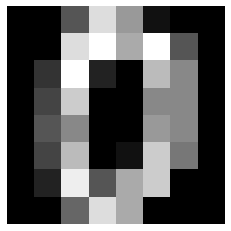

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

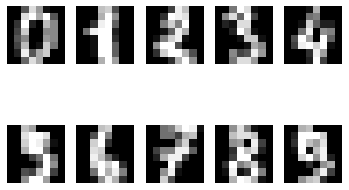

In [17]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

### **Split Train&Test set**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.3,
                                                    random_state=15)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train), ', y_test 개수: ', len(y_test))

X_train 개수:  1257 , X_test 개수:  540
y_train 개수:  1257 , y_test 개수:  540


## ***Training with various models***

### **DecisionTree**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [39]:
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.73      0.80      0.77        61
           2       0.88      0.91      0.89        56
           3       0.70      0.79      0.74        42
           4       0.90      0.71      0.79        65
           5       0.85      0.96      0.91        55
           6       0.94      0.91      0.92        53
           7       0.86      0.89      0.88        57
           8       0.71      0.76      0.74        42
           9       0.87      0.73      0.80        64

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.84      0.84      0.84       540



In [42]:
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_test,y_pred,binary=False)

cm

array([[42,  0,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0, 49,  0,  1,  2,  0,  0,  4,  3,  2],
       [ 0,  4, 51,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 33,  0,  1,  0,  1,  5,  0],
       [ 3,  3,  1,  2, 46,  2,  2,  2,  1,  3],
       [ 1,  0,  0,  0,  0, 53,  0,  0,  0,  1],
       [ 0,  2,  2,  0,  1,  0, 48,  0,  0,  0],
       [ 0,  2,  0,  3,  0,  0,  0, 51,  0,  1],
       [ 0,  4,  2,  3,  0,  1,  0,  0, 32,  0],
       [ 0,  3,  0,  4,  2,  5,  0,  1,  2, 47]])

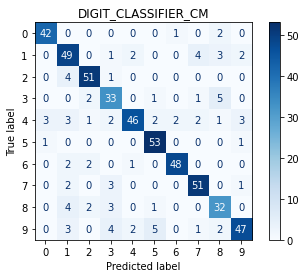

In [54]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(decision_tree, X_test, y_test,
                             display_labels=digits_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("DIGIT_CLASSIFIER_CM")
plt.show()

### **RandomForset**

In [57]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.97      1.00      0.98        61
           2       1.00      0.98      0.99        56
           3       0.98      0.98      0.98        42
           4       0.97      0.95      0.96        65
           5       1.00      1.00      1.00        55
           6       1.00      0.98      0.99        53
           7       0.97      1.00      0.98        57
           8       0.93      0.95      0.94        42
           9       0.97      0.95      0.96        64

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [58]:
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_test,y_pred,binary=False)

cm

array([[43,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 61,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 62,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 40,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 61]])

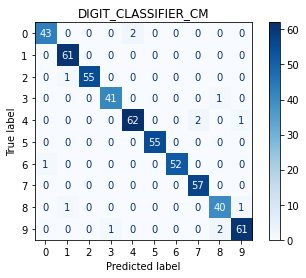

In [59]:
disp = plot_confusion_matrix(random_forest, X_test, y_test,
                             display_labels=digits_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("DIGIT_CLASSIFIER_CM")
plt.show()

### **SVM**

In [60]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.98      1.00      0.99        61
           2       1.00      1.00      1.00        56
           3       0.98      0.98      0.98        42
           4       0.98      0.97      0.98        65
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        53
           7       0.98      1.00      0.99        57
           8       0.95      0.98      0.96        42
           9       0.98      0.97      0.98        64

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



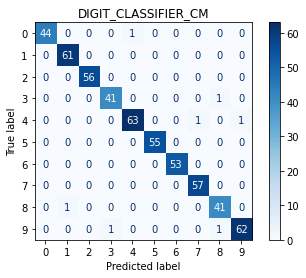

In [62]:
disp = plot_confusion_matrix(svm_model, X_test, y_test,
                             display_labels=digits_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("DIGIT_CLASSIFIER_CM")
plt.show()

### **SGD**

In [63]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(max_iter=1000, shuffle=False)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.92      0.90      0.91        61
           2       1.00      0.93      0.96        56
           3       1.00      0.79      0.88        42
           4       0.97      0.95      0.96        65
           5       0.98      0.96      0.97        55
           6       1.00      0.89      0.94        53
           7       0.95      1.00      0.97        57
           8       0.65      0.95      0.77        42
           9       0.89      0.91      0.90        64

    accuracy                           0.93       540
   macro avg       0.94      0.92      0.92       540
weighted avg       0.94      0.93      0.93       540



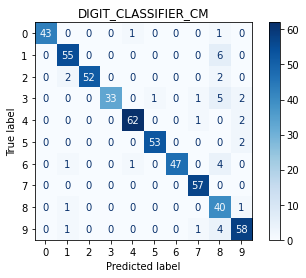

In [64]:
disp = plot_confusion_matrix(sgd_model, X_test, y_test,
                             display_labels=digits_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("DIGIT_CLASSIFIER_CM")
plt.show()

### **LogisticClassifier**

In [65]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression(random_state=0, max_iter=5000,solver='saga').fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.94      0.98      0.96        61
           2       1.00      0.96      0.98        56
           3       0.95      0.93      0.94        42
           4       0.97      0.95      0.96        65
           5       0.98      0.96      0.97        55
           6       0.98      0.98      0.98        53
           7       0.98      1.00      0.99        57
           8       0.89      0.98      0.93        42
           9       0.97      0.92      0.94        64

    accuracy                           0.96       540
   macro avg       0.96      0.97      0.96       540
weighted avg       0.97      0.96      0.96       540



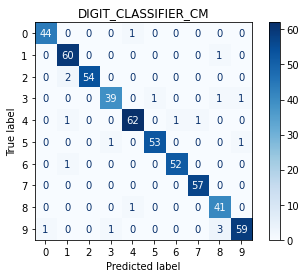

In [67]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=digits_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("DIGIT_CLASSIFIER_CM")
plt.show()

## ***COMMENTS*** 






*   ACCURARCY가 95% 넘어가는 Model은 총 3개이다.
> RandomForest / SVM /LogisticClassifier


*   Precison, Recall < F-1 score에 중심을 두고 본 결과, SVM이 효과적으로 분류했다고 볼 수 있다.

